# Customer analysis

In this exercise, you work for a consulting firm as data analyst. One of your clients asked for help to understand its customer buying behavior. 

You dispose of a dataset from its e-commerce website with 13 features : 

- order_id : ID if the order
- order_status : Status of the order
- order_purchase_timestamp : Timestamp of the purchase
- order_delivered_customer_date : Timestamp of the delivery to the customer
- payment_type : Method of payment
- payment_installments : Number of payments for this purchase (does NOT affect the payment value)
- payment_value : Total amount of the payment
- review_score : Score given by the client, ranges from 1 to 5
- customer_unique_id : ID of the customer who purchased
- customer_zip_code_prefix : Zip code of the customer
- customer_city : City of the customer
- customer_state : State of the customer
- product_category_name_english : Name of the product category in English

With this data, you have to analyze customer behavior with two techniques:

- Customer segmentation with RFM
- Cohort analysis from Sept 2016 to October 2018.

At the end, you have to present your analysis with actionable insights to improve the customer relationship of your client. 

# Understanding RFM Segmentation 

❓ What are the 3 metrics used in an RFM Segmentation? (hint : What does RFM stand for?) 

With RFM Segmentation, we use 3 specific metrics : - Recency (R)
                                                   - Frequency (F)
                                                   - Monetary (M)

❓ Can you summarize what each metric measures in one sentence?

1) Recency (R): How recently customers have made their purchases.

2) Frequency (F): How often customers have made their purchases.

3) Monetary (M): How much money customers have paid for their purchases.

❓ What data / or type of data do you need for each metric ? 

1) Recency: date of the last purchase (timestamp or int/float, [order_purchase_timestamp])

2) Frequency: total number of purchase (int/float, [payment_installments])

3) Monetary: total amount of purchase (int/float, [payment_value])

Let's explore the dataset!

# Exploratory Data Analysis

In [48]:
# Libraries
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from operator import attrgetter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

Load the dataset and start an Exploratory Data Analysis

In [54]:
df = pd.read_csv('../data/db_customers.csv')
df

,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105378,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,credit_card,3.0,85.08,5,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,health_beauty
105379,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,credit_card,3.0,195.00,4,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,baby
105380,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,credit_card,5.0,271.01,5,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,home_appliances_2
105381,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,credit_card,4.0,441.16,2,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,computers_accessories


❓ Which features should be formated in datetime ? 
Convert them

We should format 2 features in datetime : [order_purchase_timestamp] and [order_delivered_customer_date]

In [70]:
df[['order_purchase_timestamp', 'order_delivered_customer_date']] = df[['order_purchase_timestamp', 'order_delivered_customer_date']].apply(pd.to_datetime)
# df.info()

❓ Which features are Categorical ? List the unique values on these features.

These features are categorical: [order_status] | [payment_type] | [customer_city] | [customer_state] | [product_category_name_english]

In [4]:
# Storing unique values for categorical features into variables
order_status=df['order_status'].unique()
payment_type=df['payment_type'].unique()
customer_city=df['customer_city'].unique()
customer_state=df['customer_state'].unique()
product_category_name_english=df['product_category_name_english'].unique()

# Printing unique values for each categorical columns
print(f'order status: {order_status}')
print(f'payment_type: {payment_type}')
print(f'order status: {customer_city}')
print(f'order status: {customer_state}')
print(f'order status: {product_category_name_english}')

order status: ['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']
payment_type: ['credit_card' 'voucher' 'boleto' 'debit_card' 'not_defined' nan]
order status: ['sao paulo' 'barreiras' 'vianopolis' ... 'messias targino'
 'campo do tenente' 'nova vicosa']
order status: ['SP' 'BA' 'GO' 'RN' 'PR' 'RS' 'RJ' 'MG' 'SC' 'RR' 'PE' 'TO' 'CE' 'DF'
 'SE' 'MT' 'PB' 'PA' 'RO' 'ES' 'AP' 'MS' 'MA' 'PI' 'AL' 'AC' 'AM']
order status: ['housewares' 'perfumery' 'auto' 'pet_shop' 'stationery' nan
 'furniture_decor' 'office_furniture' 'garden_tools'
 'computers_accessories' 'bed_bath_table' 'toys'
 'construction_tools_construction' 'telephony' 'health_beauty'
 'electronics' 'baby' 'cool_stuff' 'watches_gifts' 'air_conditioning'
 'sports_leisure' 'books_general_interest' 'small_appliances' 'food'
 'luggage_accessories' 'fashion_underwear_beach' 'christmas_supplies'
 'fashion_bags_accessories' 'musical_instruments'
 'construction_tools_lights' 'books_technical' 'cos

❓ Check for missing values. What do you notice ? 


In [5]:
# Checking for missing values
df.isnull().sum()

order_id                            0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    3159
payment_type                        1
payment_installments                1
payment_value                       1
review_score                        0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_category_name_english    2410
dtype: int64

We can see missing values in 5 features: 1) payment_type, payement_installments, payment_value (1 missing value in each)
                                         2) order_delivered_customer_date (3159)
                                         3) product_category_name_english(2410)

❓ Can you find an explanation for the missing `order_delivered_customer_date` ? 
(hint : Check for non delivered orders)

In [6]:
# Checking if missing order_delivered_customer_date count is equal to all purchases which are not yet delivered
df[df['order_status'] != "delivered"].shape

(3158, 13)

We have 3158 missing values for order_delivered_customer_date. It's because these purchases are not delivered yet. There is a difference of 1, and I think it's because of the missing value in the 3 other features (payment_type,installments,value).

❓ What are the proportions of each `order_status` ? 

In [7]:
# Calculate ratio of each order status in our dataframe.
df['order_status'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

delivered      97.0%
shipped         1.1%
canceled        0.6%
unavailable     0.6%
invoiced        0.3%
processing      0.3%
created         0.0%
approved        0.0%
Name: order_status, dtype: object

❓ Which `order_status` do you think should be removed from the analysis

I would removed all the order_status, except delivered and shipped status. These 2 orders represent 98% of the order_status, and
we want to focus on this because it will be easier to segmentate our different customers.

❓ What feature would you choose in the e-commerce dataset provided? 

We need to choose [order_purchase_timestamp] for calculating the recency, [customer_unique_id] and [order_id] for frequency,
and [payment_value] for monetary.

❓ What method would you use to group the data? 

I would use the .groupby() method from pandas library in order to group our data

❓ What feature would you use to group the data? 

I would use the customer_unique_id in order to group the data.

Group the data. (Hint: you can carry out the grouping one by one and then merge, or even better use the .agg method and get a robust grouping in one line of code)

In [71]:
df_new = df[(df['order_status'] != "delivered") & (df['order_status'] != "shipped")].index
df.drop(df_new , inplace=True)
df['order_status'].value_counts()

delivered    102225
shipped        1180
Name: order_status, dtype: int64

In [72]:
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].apply(pd.to_datetime)
date_format = "%m/%d/%Y"
a = df['order_purchase_timestamp']
b = max(df['order_purchase_timestamp'])
df['Recency'] = b-a
df['Recency'] = df['Recency'].astype('timedelta64[D]')
recence = df.groupby('customer_unique_id')['Recency'].min()
recence = pd.DataFrame(recence).reset_index()
# recence

In [73]:
orders = df.groupby(['customer_unique_id']).agg(
#     Recency = pd.NamedAgg(column='order_purchase_timestamp', aggfunc= lambda x: max(x) - x),
    Frequency = pd.NamedAgg(column='payment_value', aggfunc='count'),
    Monetary = pd.NamedAgg(column='payment_value', aggfunc=sum)
).reset_index()
# orders.head()
orders

,customer_unique_id,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19
2,0000f46a3911fa3c0805444483337064,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,1,196.89
...,...,...,...
94394,fffcf5a5ff07b0908bd4e2dbc735a684,1,2067.42
94395,fffea47cd6d3cc0a88bd621562a9d061,1,84.58
94396,ffff371b4d645b6ecea244b27531430a,1,112.46
94397,ffff5962728ec6157033ef9805bacc48,1,133.69


In [74]:
df_rfm = recence.merge(orders, left_on='customer_unique_id',right_on = 'customer_unique_id',how ='left')
df_rfm

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115.0,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118.0,1,27.19
2,0000f46a3911fa3c0805444483337064,541.0,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,325.0,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,292.0,1,196.89
...,...,...,...,...
94394,fffcf5a5ff07b0908bd4e2dbc735a684,451.0,1,2067.42
94395,fffea47cd6d3cc0a88bd621562a9d061,266.0,1,84.58
94396,ffff371b4d645b6ecea244b27531430a,572.0,1,112.46
94397,ffff5962728ec6157033ef9805bacc48,123.0,1,133.69


What type of data is the R supposed to be? Is it in the right format? (Hint : investigate the difference between `datetime` and `timedelta`) 

So there is one more step to carry out before the data is ready : Calculate the recency base on the date of the purchase

❓ What is the date of the least purchase?

In [75]:
NOW1 = df['order_purchase_timestamp'].min()
NOW1

Timestamp('2016-09-04 21:15:19')

❓What is the date of the most recent purchase?

In [76]:
NOW2 = df['order_purchase_timestamp'].max()
NOW2

Timestamp('2018-09-03 09:06:57')

❓How would you calculate the recency? (hint: what date would you use to compare with the purchase date? Today? probably not...)

Create a feature calculating the difference between `the most recent purchased + 1 day`, and `order_purchase_timestamp`.

In [77]:
difference = NOW2 - (NOW1 + timedelta(days=1))
difference

Timedelta('727 days 11:51:38')

Now that you have created a new dataset with the right columns, explore it to understand what you created.

❓Which column is the R? The F? The M?

Now for each metric independantly, build clutsers (Hint 1: you can use `.describe()` to have insights about each metrics. Hint 2: Don't choose more than 3 clusters)

In [17]:
df_rfm.describe()

,Recency,Frequency,Monetary
count,94399.000000,94399.000000,94399.000000
mean,241.864162,1.095393,168.250134
std,152.723176,0.530316,232.880460
min,0.000000,0.000000,0.000000
25%,118.000000,1.000000,63.110000
50%,223.000000,1.000000,108.100000
75%,351.000000,1.000000,184.590000
max,728.000000,54.000000,13664.080000


In [78]:
###Calculating quantile values
quintiles = df_rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .8]).to_dict()
###Benchmark to give score for Recency indicator
def r_score(r):
    if r < quintiles['Recency'][.2]:
        return 3 
    elif r < quintiles['Recency'][.8]:
        return 2
    else: 
        return 1
###Benchmark to give score for Frequency indicator.   
def f_score(f): 
    if f > quintiles['Frequency'][.8]:
        return 3
    elif f > quintiles['Frequency'][.2]: 
        return 2
    else: 
        return 1
###Benchmark to give score for Monetary indicator
def m_score(m): 
    if m > quintiles['Monetary'][.8]:
        return 3
    elif m > quintiles['Monetary'][.2]: 
        return 2
    else: 
        return 1

In [79]:
rfm2 = df_rfm.copy()
rfm2['r_score'] = rfm2.Recency.apply(lambda x: r_score(x))
rfm2['f_score'] = rfm2.Frequency.apply(lambda x: f_score(x))
rfm2['m_score'] = rfm2.Monetary.apply(lambda x: m_score(x))
rfm2['rfm'] = rfm2['r_score'].map(str)+rfm2['f_score'].map(str) + rfm2['m_score'].map(str)
rfm2

,customer_unique_id,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm
0,0000366f3b9a7992bf8c76cfdf3221e2,115.0,1,141.90,2,1,2,212
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118.0,1,27.19,2,1,1,211
2,0000f46a3911fa3c0805444483337064,541.0,1,86.22,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,325.0,1,43.62,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,292.0,1,196.89,2,1,2,212
...,...,...,...,...,...,...,...,...
94394,fffcf5a5ff07b0908bd4e2dbc735a684,451.0,1,2067.42,1,1,3,113
94395,fffea47cd6d3cc0a88bd621562a9d061,266.0,1,84.58,2,1,2,212
94396,ffff371b4d645b6ecea244b27531430a,572.0,1,112.46,1,1,2,112
94397,ffff5962728ec6157033ef9805bacc48,123.0,1,133.69,2,1,2,212


In [33]:
rfm2['rfm'].value_counts()

212    32440
211    10848
312    10737
112    10537
213     9658
111     3798
311     3637
113     3305
313     3155
232     1747
233     1661
132      648
333      634
332      535
133      466
231      357
131      142
331       94
Name: rfm, dtype: int64

In [80]:
rfm2['rfm'].astype(str)

0        212
1        211
2        112
3        211
4        212
        ... 
94394    113
94395    212
94396    112
94397    212
94398    112
Name: rfm, Length: 94399, dtype: object

In [3]:
# ###Loyal Customers, who are the champions of all the customers with highest score of RFM. 
# rfm2_group1 = rfm2[rfm2['rfm']=='333']
# rfm2_group1['label'] = 'champion'
# ###Customers who have the most potential to become the Champions. They recently buy the products and they make their purchases quite frequently. Moreover, the amount they spent is quite great. rfm2_group2 = rfm2[rfm2['rfm'].str.contains('332|331|323|313')] 
# rfm2_group2 = rfm2[rfm2['rfm']=='332']
# rfm2_group2['label'] = 'potential1'
# ###Customers whose frequency score and monetary score are slightly lower than potential 1 group
# rfm2_group3 = rfm2[rfm2['rfm'].str.contains('321|322|311|312')] 
# rfm2_group3['label'] = 'potential2'
# ###Customers who used to pay a lot of money and come to the store frequently. They did not purchase recently. 
# rfm2_group4 = rfm2[rfm2['rfm'].str.contains('233')]
# rfm2_group4['label'] = 'needing_attention1'
# ###Customers who do not come to store often and not frequently make purchases.
# rfm2_group5 = rfm2[rfm2['rfm'].str.contains('223|213|212|231|232|211|221|222')]
# rfm2_group5['label'] = 'needing_attention2'
# ###Customers who haven't paid a visit to the store for a long time. However, once in a while, they do spend lot of money
# rfm2_group6 = rfm2[rfm2['rfm'].str.contains('132|123|113|133')]
# rfm2_group6['label'] = 'lost1'
# ###Customers who churn
# rfm2_group7 = rfm2[rfm2['rfm'].str.contains('111|112|121|122|131')]
# rfm2_group7['label'] = 'lost2'

Now that you have clusters for each category, explain the different buying behaviors

In [81]:
rfm2

,customer_unique_id,Recency,Frequency,Monetary,r_score,f_score,m_score,rfm
0,0000366f3b9a7992bf8c76cfdf3221e2,115.0,1,141.90,2,1,2,212
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118.0,1,27.19,2,1,1,211
2,0000f46a3911fa3c0805444483337064,541.0,1,86.22,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,325.0,1,43.62,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,292.0,1,196.89,2,1,2,212
...,...,...,...,...,...,...,...,...
94394,fffcf5a5ff07b0908bd4e2dbc735a684,451.0,1,2067.42,1,1,3,113
94395,fffea47cd6d3cc0a88bd621562a9d061,266.0,1,84.58,2,1,2,212
94396,ffff371b4d645b6ecea244b27531430a,572.0,1,112.46,1,1,2,112
94397,ffff5962728ec6157033ef9805bacc48,123.0,1,133.69,2,1,2,212


# Working with cohorts

❓What is a cohort? 

A cohort is a group of people sharing same characteristics or behaviour.

❓Why is it interesting to analyse cohorts ? 

This type of analysis is interesting because you can find different groups of customers who have the same pattern when using your site or brand. It allows you to ask more specific question, more targeted question and make inform product decision that will reduce the loss of customers and increase your revenue.

❓What data (already existing in the original dataset) do we need to build a cohort? 

We need these features: customer_unique_id, order_purchase_timestamp and order_id

Build a new df with just these 3 features

In [55]:
df_c = df[['customer_unique_id', 'order_purchase_timestamp', 'order_id']]
df_c['order_purchase_timestamp'] = df_c['order_purchase_timestamp'].apply(pd.to_datetime)

<ipython-input-55-f09715792a6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['order_purchase_timestamp'] = df_c['order_purchase_timestamp'].apply(pd.to_datetime)


In [57]:
# df_c.info()

Using the `pandas.Serie.dt.to_period()` methode, create a new feature converting `order_purchase_timestamp` in months

In [58]:
# First, we need to apply .DatetimeIndex to our column
months = pd.DatetimeIndex(df_c['order_purchase_timestamp'])

# Then, we create a new column, with these new values (months)
df_c['order_months'] = months.to_period('M')

df_c

<ipython-input-58-ae54ea53a353>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['order_months'] = months.to_period('M')


,customer_unique_id,order_purchase_timestamp,order_id,order_months
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,2017-10
1,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,2017-10
2,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,2017-10
3,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,53cdb2fc8bc7dce0b6741e2150273451,2018-07
4,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,47770eb9100c2d0c44946d9cf07ec65d,2018-08
...,...,...,...,...
105378,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09 09:54:05,9c5dedf39a927c1b2549525ed64a053c,2017-03
105379,da62f9e57a76d978d02ab5362c509660,2018-02-06 12:58:58,63943bddc261676b46f01ca7ac2f7bd8,2018-02
105380,737520a9aad80b3fbbdad19b66b37b30,2017-08-27 14:46:43,83c1379a015df1e13d02aae0204711ab,2017-08
105381,5097a5312c8b157bb7be58ae360ef43c,2018-01-08 21:28:27,11c177c8e97725db2631073c19f07b62,2018-01


Create a new feature called `cohort` by grouping the previous df by `customer_unique_id`, and tranforming it's minimum value in months (with the same `pandas.Serie.dt.to_period()` as before)

In [59]:
# For the teachers, To filter by only the customer that have done 2 or more purchases
df_more = pd.DataFrame(df_c.groupby('customer_unique_id').size()[df_c.groupby('customer_unique_id').size() > 1])
df_c = df_c.merge(df_more, how='left', on='customer_unique_id').rename(columns={0:'na'})

df_c = df_c[df_c['na'].notna()]

In [61]:
df_c['cohort'] = df_c.groupby('customer_unique_id')['order_purchase_timestamp'] \
                 .transform('min') \
                 .dt.to_period('M') 
df_c

,customer_unique_id,order_purchase_timestamp,order_id,order_months,na,cohort
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,2017-10,4.0,2017-09
1,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,2017-10,4.0,2017-09
2,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,2017-10,4.0,2017-09
11,299905e3934e9e181bfb2e164dd4b4f8,2017-07-29 11:55:02,e69bfb5eb88e0ed6a785585b27e16dbf,2017-07,2.0,2017-07
12,299905e3934e9e181bfb2e164dd4b4f8,2017-07-29 11:55:02,e69bfb5eb88e0ed6a785585b27e16dbf,2017-07,2.0,2017-07
...,...,...,...,...,...,...
105367,9e4accf95024aa6565ca1efcadb96752,2018-05-12 13:42:24,19dba6d1e58b04e7fc820558a38ea398,2018-05,2.0,2017-09
105373,c716cf2b5b86fb24257cffe9e7969df8,2017-10-04 19:57:37,9115830be804184b91f5c00f6f49f92d,2017-10,2.0,2017-10
105374,c716cf2b5b86fb24257cffe9e7969df8,2017-10-04 19:57:37,9115830be804184b91f5c00f6f49f92d,2017-10,2.0,2017-10
105375,e03dbdf5e56c96b106d8115ac336f47f,2017-01-27 00:30:03,aa04ef5214580b06b10e2a378300db44,2017-01,2.0,2017-01


Now groupby `['cohort', 'order_month']` and aggregate by `nunique()` `customer_unique_id`

In [62]:
df_cohort = df_c.groupby(['cohort', 'order_months']) \
              .agg(n_customers=('customer_unique_id', 'nunique')) \
              .reset_index(drop=False)

df_cohort['period_number'] = (df_c.order_months - df_c.cohort).apply(attrgetter('n'))
df_cohort

,cohort,order_months,n_customers,period_number
0,2016-10,2016-10,25,1.0
1,2016-10,2017-04,1,1.0
2,2016-10,2017-07,1,1.0
3,2016-10,2017-09,1,NaN
4,2016-10,2017-11,1,NaN
...,...,...,...,...
217,2018-07,2018-08,44,NaN
218,2018-07,2018-09,2,NaN
219,2018-08,2018-08,246,NaN
220,2018-08,2018-09,7,NaN


In [33]:
# test_df = df_c.groupby(['cohort', 'order_months']).agg(
#     n_customers = pd.NamedAgg(column='customer_unique_id', aggfunc='nunique')
# )
# test_df

Finally, create a feature called `['period_number']` where you substract the `cohort` to the `order_month` and get the `'n'` attribute thanks to the `operator.attrgetter` method

In [34]:
# df_c['period_number'] = (df_c.order_months - df_c.cohort).apply(attrgetter('n'))
# df_c

In [15]:

# # test_df['pediod_number'] = test_df['cohort'] - test_df['order_months']
# period_number = df_c['order_months'] - df_c['cohort']
# # period_number.attrgetter('n')
# attr = attrgetter('n')(period_number)
# attr
# # period_number.value_counts()

Explore a cohort (for example 2017-01) and try to understand what it shows

In [86]:
df_cohort[df_cohort['cohort'] == '2018-01']

,cohort,order_month,n_customers,period_number
182,2018-01,2018-01,211,0
183,2018-01,2018-02,23,1
184,2018-01,2018-03,25,2
185,2018-01,2018-04,20,3
186,2018-01,2018-05,20,4
187,2018-01,2018-06,11,5
188,2018-01,2018-07,12,6
189,2018-01,2018-08,16,7


Pivot the DataFrame using the methode : `DataFrame.pivot_table` (hint : use `'cohort'` as `index`, `'period_number'` as columns, and `'n_customers'` as `values`)

In [64]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')
cohort_pivot

period_number,0.0,1.0,5.0,6.0,20.0
cohort,,,,,
2016-10,NaN,9.0,NaN,NaN,NaN
2017-01,18.800000,NaN,NaN,1.0,1.0
2017-03,7.000000,NaN,NaN,NaN,NaN
2017-04,7.000000,1.0,NaN,NaN,NaN
2017-05,12.333333,NaN,NaN,NaN,NaN
2017-06,98.666667,NaN,NaN,NaN,NaN
2017-07,12.000000,NaN,NaN,NaN,NaN
2017-08,12.500000,NaN,NaN,NaN,NaN
2017-09,7.000000,NaN,NaN,NaN,NaN


In [41]:
# table = pd.pivot_table(df_cohort, values='n_customers', index=['cohort'],
#                     columns=['period_number'], aggfunc=sum)
# table

Now divide all the values (except you column 0) by the column 0 and name this new DataFrame `retention_matrix`

In [65]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

Plot your `retention matrix` using the code below : 

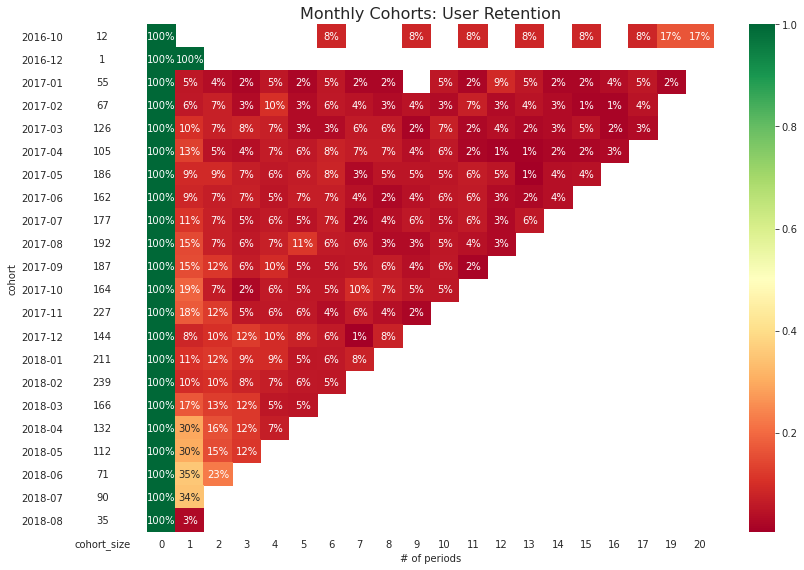

In [84]:

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()


What do you notice? 

With the plot above, we can se that almost all of the customers will not stick with this company. The different cohorts will not buy again after their first  

How could we have know that before? (hint : Calculate the percentage of customers who have ordered more than once)

In [93]:
multiple_purchases_customers = round((15753 * 100) / 105383)
print(f'Custormers with more than 1 purchase: {multiple_purchases_customers}%')

Custormers with more than 1 purchase: 15%


Here is the code for the analysis of customers who have bought more than once : 

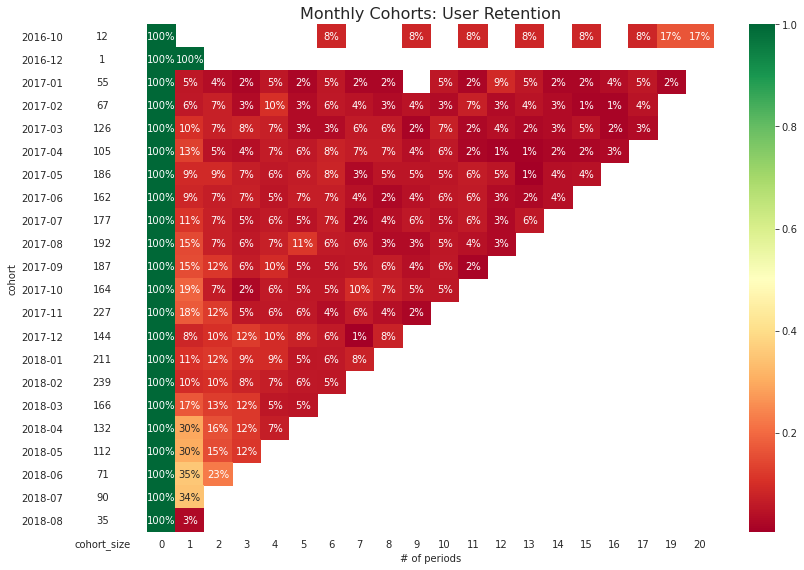

In [82]:
#start from your df created doing the RFM segmentation
df_c = df[['customer_unique_id', 'order_id',
           'order_purchase_timestamp']].drop_duplicates()

df_c['order_month'] = df_c['order_purchase_timestamp'].dt.to_period('M')

df_more = pd.DataFrame(df_c.groupby('customer_unique_id').size()[
                       df_c.groupby('customer_unique_id').size() > 1])

df_c = df_c.merge(df_more, how='left', on='customer_unique_id').rename(
    columns={0: 'na'})

df_c = df_c[df_c['na'].notna()]
df_c['cohort'] = df_c.groupby('customer_unique_id')['order_purchase_timestamp'] \
    .transform('min') \
    .dt.to_period('M')

df_cohort = df_c.groupby(['cohort', 'order_month']) \
    .agg(n_customers=('customer_unique_id', 'nunique')) \
    .reset_index(drop=False)
df_cohort['period_number'] = (
    df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
cohort_pivot = df_cohort.pivot_table(index='cohort',
                                     columns='period_number',
                                     values='n_customers')
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={
                           'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(
        columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()